Here we are going to discuss the Henon attractor, which is defined by

$(x_{k+1}, y_{k+1})= (y_k +1 - ax^2_k, b x_k) $

where we use $a=1.4$ and $b=0.3$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

In [2]:
def h(x, a=1.4, b=0.3):
    return np.array([x[1]+1 -a*x[0]**2, b*x[0]])

Define the Trapping region

In [3]:
tp_region = np.array([[-1.33, 0.42],[1.32, 0.133],[1.245, -0.14],[-1.06, -0.5]])

Let us generate the curves defining the trapping region

In [4]:
num_pnts = 1000
bc = np.zeros([4, 2, num_pnts])
spac = np.linspace(0.0, 1.0, num_pnts)
for ind1 in range(4):
    ind_s = ind1 + 1 - 4*((ind1 +1)//4)
    for ind2 in range(2):
        delt = tp_region[ind1, ind2]-tp_region[ind_s, ind2]
        bc[ind1, ind2] = tp_region[ind_s, ind2]+spac*delt

Let us plot the results

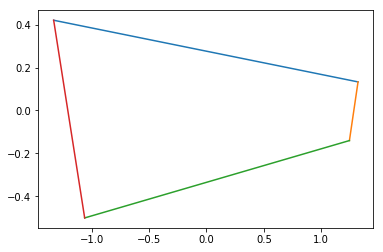

In [5]:
for ind1 in range(4):
    plt.plot(bc[ind1, 0], bc[ind1, 1])
plt.show()

First iteration

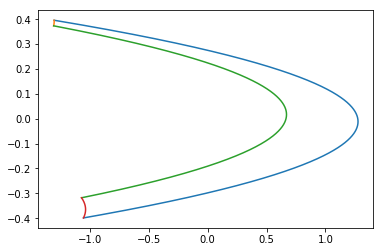

In [6]:
v1 = np.zeros_like(bc)
for ind1 in range(4):
    v1[ind1] = h(bc[ind1])
plt.show()

for ind1 in range(4):
    plt.plot(v1[ind1, 0], v1[ind1, 1])
plt.show()

second iteration

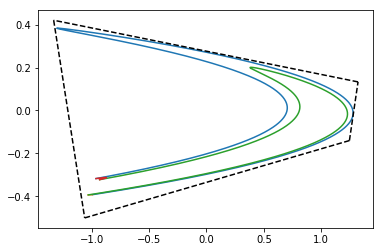

In [7]:
v2 = np.zeros_like(v1)
for ind1 in range(4):
    v2[ind1] = h(v1[ind1])

for ind1 in range(4):
    plt.plot(v2[ind1, 0], v2[ind1, 1])
    plt.plot(bc[ind1, 0], bc[ind1, 1], '--k')
plt.show()

Let us perform k iterations

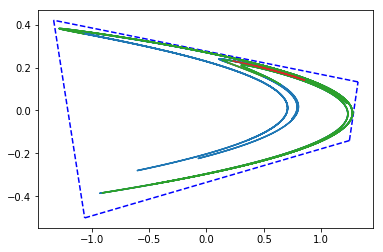

In [8]:
k= 4
for indk in range(k):
    v1[:, :] = v2[:, :]
    for ind1 in range(4):
        v2[ind1] = h(v1[ind1])
    
for ind1 in range(4):
    plt.plot(v2[ind1, 0], v2[ind1, 1])
    plt.plot(bc[ind1, 0], bc[ind1, 1], '--b')
plt.show()

This is the attractor: It is more complicated that it seems. Let us generate a series of points starting with $(x_0, y_0)= (0.0, 0.0)$

In [9]:
num_series = 100
pnts = np.zeros([2, num_series])
pnts[:, 0] = np.array([0.0, 0.0])
for ind in range(num_series-1):
    pnts[:, ind+1] = h(pnts[:, ind])

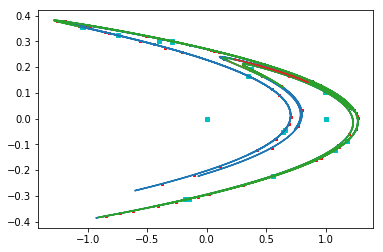

In [10]:
num_ini = 20
fs = 2
plt.plot(pnts[0, :num_ini], pnts[1, :num_ini], 'sc', markersize=2*fs)
plt.plot(pnts[0, num_ini:], pnts[1, num_ini:], 'sr', markersize=fs)
for ind1 in range(4):
    plt.plot(v2[ind1, 0], v2[ind1, 1])
plt.show()

Note that the squares are the results of the first num_ini iterations, while the small red spheres are the results after at least num_ini iterations, and all points are in the attractor.

Let us consider slightly different initial condition

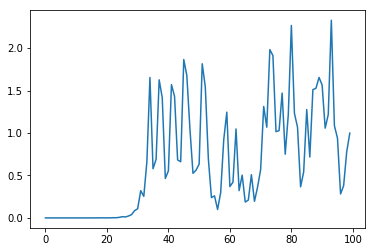

In [11]:
num_series = 100
eps = 1e-6
pnts_d = np.zeros([2, num_series])
pnts_d[:, 0] = np.array([eps, 0.0])
for ind in range(num_series-1):
    pnts_d[:, ind+1] = h(pnts_d[:, ind])

plt.plot(la.norm(pnts-pnts_d, axis=0))
plt.show()

Here we can see that after about 30 iterations, the initial conditions start to diverge.

Let us analyze the first 30 iterations

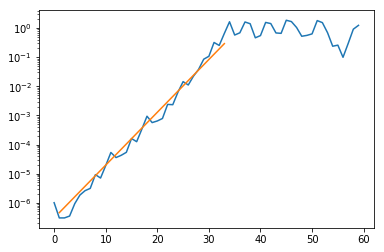

In [12]:
num_series = 60
eps = 1e-6
y_h = (0.603)*np.log(2)
const = 3e-7
pnts_d = np.zeros([2, num_series])
pnts_d[:, 0] = np.array([eps, 0.0])
for ind in range(num_series-1):
    pnts_d[:, ind+1] = h(pnts_d[:, ind])

plt.semilogy(la.norm(pnts_d[:, :num_series]-pnts[:, :num_series], axis=0))
val = np.arange(1, 34)
plt.semilogy(val, const*np.exp(val*y_h))
plt.show()

In [13]:
print('The Largest Lyapunov exponent is = ', y_h)

The Largest Lyapunov exponent is =  0.417967749878


In [14]:
y_s = np.log(0.3) - y_h
print('The smallest Lyapunov exponent is =', y_s)

The smallest Lyapunov exponent is = -1.6219405542


In [15]:
print('The information dimension is =', 1+y_h/np.abs(y_s))

The information dimension is = 1.25769609669


Therefore the Henon map for $b=0.3, a=1.4$ defines a strange attractor with dimension $d_L = 1.258$